# Part 1 - EDA

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy, scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import (
    ConfusionMatrixDisplay

)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import chi2_contingency
from sklearn.model_selection import learning_curve
from scipy.stats import skew, kurtosis
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('insurance.csv')
df.info()
print(df.describe())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max     

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
duplicates = len(df[df.duplicated()])

missing_values = df.isnull().sum().sum()

print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(df.shape[1]))
print('Number of Observations: %d'%(df.shape[0]))

Number of Duplicate Entries: 1
Number of Missing Values: 0
Number of Features: 7
Number of Observations: 1338


In [7]:
print("Object type columns: ",list(df.select_dtypes(include='object')))
print("Number type columns: ", list(df.select_dtypes(include='number')))

Object type columns:  ['sex', 'smoker', 'region']
Number type columns:  ['age', 'bmi', 'children', 'charges']


In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
print(df.shape)
print(df.size)

(1337, 7)
9359


In [10]:
def pie_plot(column, ax):
    ax.pie(df[column].value_counts(), autopct="%0.2f%%",
           labels=df[column].value_counts().index,
           colors=['#1f77b4', '#3498db', '#74b9ff'])
    ax.set(title=f"Pie Chart of {column}")

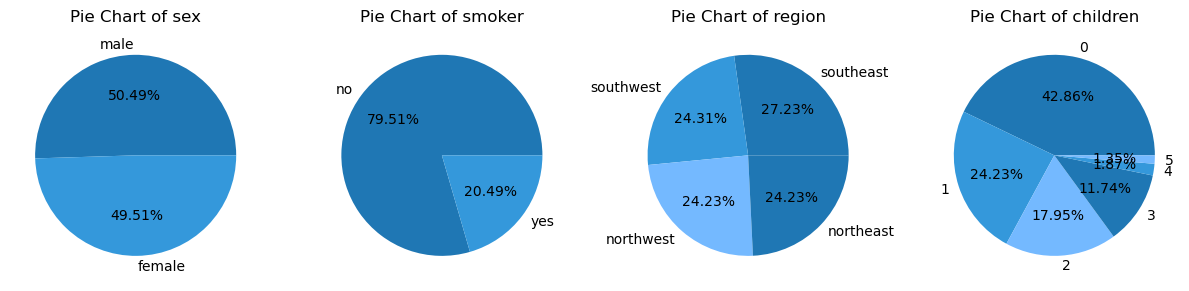

In [11]:
columns = ["sex", "smoker", "region",'children']
fig, axes = plt.subplots(1, len(columns), figsize=(12, 4))

for i, column in enumerate(columns):
    pie_plot(column, axes[i])

plt.tight_layout()
plt.show()

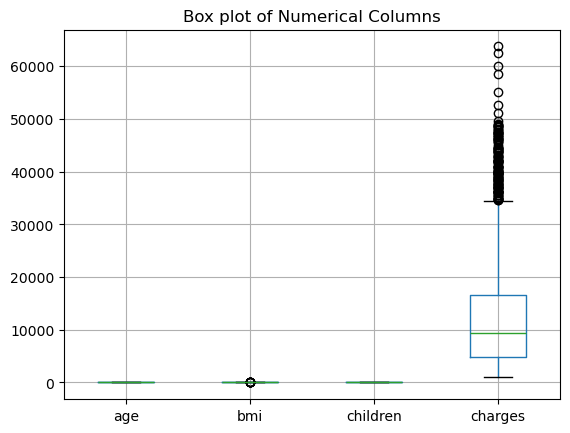

In [12]:
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

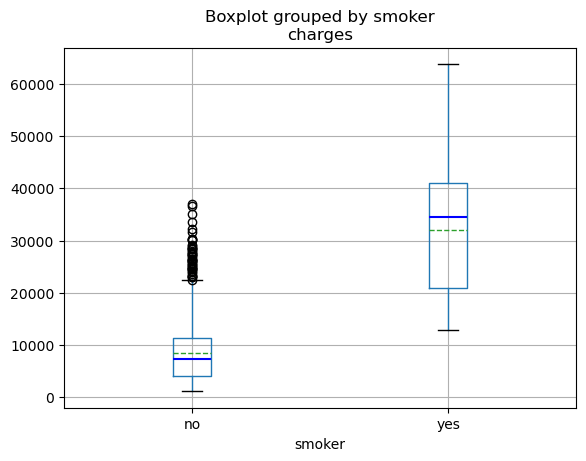

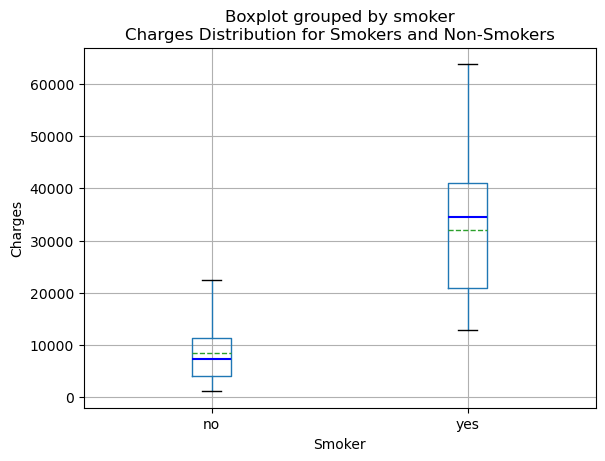

In [13]:
df.boxplot(column='charges', by='smoker', showmeans = True, meanline = True, medianprops = dict(color = "blue", linewidth = 1.5))

df.boxplot(column='charges', by='smoker', showfliers = False, showmeans = True, meanline = True, medianprops = dict(color = "blue", linewidth = 1.5))
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

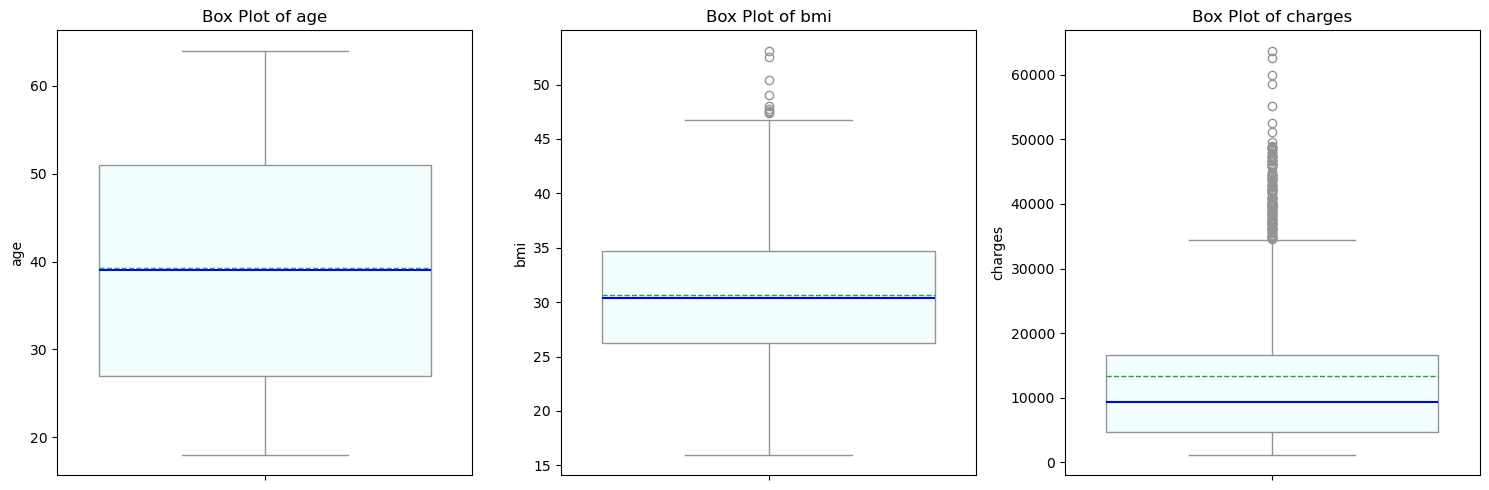

In [14]:
numerical_vars = ['age', 'bmi', 'charges']
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[var], showmeans = True, meanline = True, medianprops = dict(color = "blue", linewidth = 1.5), color="azure")
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'southeast'),
  Text(1, 0, 'southwest'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

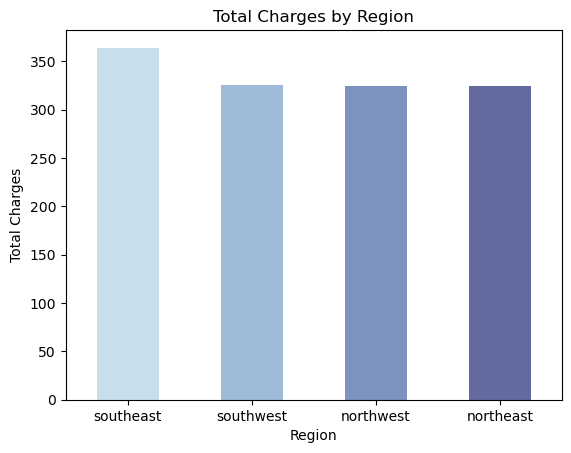

In [15]:
df.region.value_counts().plot(kind='bar', color=sns.color_palette("ch:s=.25,rot=-.25"))

plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

plt.xticks(rotation=45)
plt.xticks(rotation=0)

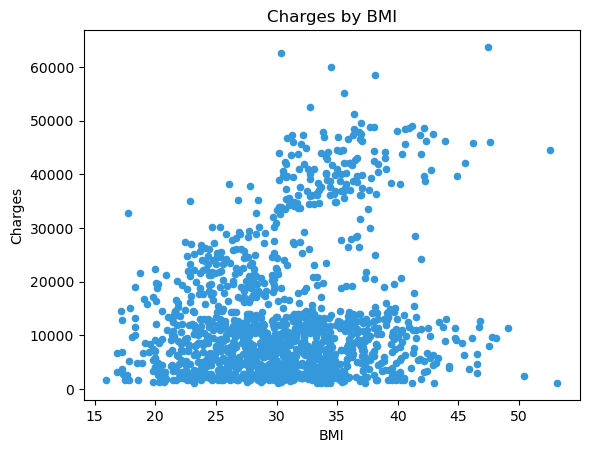

In [16]:
df.plot(kind='scatter', x='bmi', y='charges', color='#3498db')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges by BMI')
plt.show()

In [17]:
df.groupby(['region'])\
    ['charges'].agg(['mean','median', 'min', 'max']).round(2)

,mean,median,min,max
region,,,,
northeast,13406.38,10057.65,1694.80,58571.07
northwest,12450.84,8976.98,1621.34,60021.40
southeast,14735.41,9294.13,1121.87,63770.43
southwest,12346.94,8798.59,1241.56,52590.83


Text(0.5, 1.0, 'Charges by BMI')

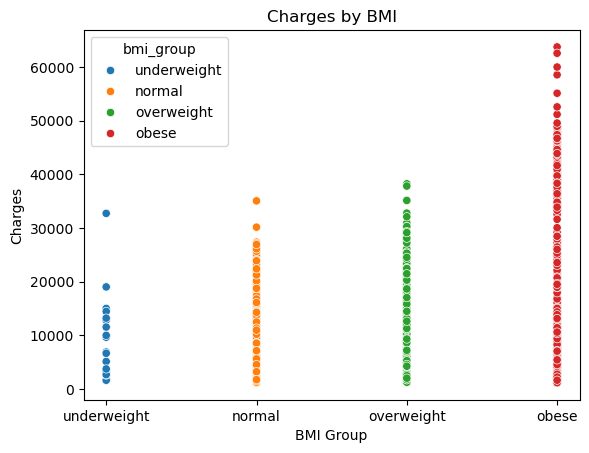

In [18]:
bins = [0,18.5,25,30,60]
bin_labels = ['underweight','normal','overweight', 'obese']

df['bmi_group'] = pd.cut(df.bmi, bins, right=False, labels = bin_labels)

df.bmi_group.value_counts().sort_index()
sns.scatterplot(x="bmi_group", y="charges", hue="bmi_group", data=df)
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.title('Charges by BMI')

In [19]:
pd.cut(df['bmi'], [0,18.5,25,30,60], labels=["underweight", "normal", "overweight", "obese"]).value_counts()

bmi
obese          704
overweight     386
normal         226
underweight     21
Name: count, dtype: int64

In [20]:
def percetage_data(df=None, column=None,sort=True):
    value_counts = df[column].value_counts(sort=sort)
    df_percentage = pd.DataFrame({'count': value_counts,
                                  'percentage': round(value_counts *100 / len(df),2)
                                 })

    return df_percentage

percetage_data(df,'bmi_group')

,count,percentage
bmi_group,,
obese,706,52.80
overweight,386,28.87
normal,225,16.83
underweight,20,1.50


In [21]:
df.groupby(['bmi_group'])\
    ['charges'].agg(['mean','median', 'min', 'max']).round(2)

C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\2137049437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['bmi_group'])\


,mean,median,min,max
bmi_group,,,,
underweight,8852.20,6759.26,1621.34,32734.19
normal,10409.34,8603.82,1121.87,35069.37
overweight,10987.51,8659.38,1252.41,38245.59
obese,15572.04,10003.65,1131.51,63770.43


In [22]:
percetage_data(df,['bmi_group','smoker'], sort=False)

count  percentage
bmi_group   smoker                   
underweight no         15        1.12
            yes         5        0.37
normal      no        175       13.09
            yes        50        3.74
overweight  no        312       23.34
            yes        74        5.53
obese       no        561       41.96
            yes       145       10.85

In [23]:
df.pivot_table(index='sex', columns='smoker', values='charges')

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8099.700161,33042.005975


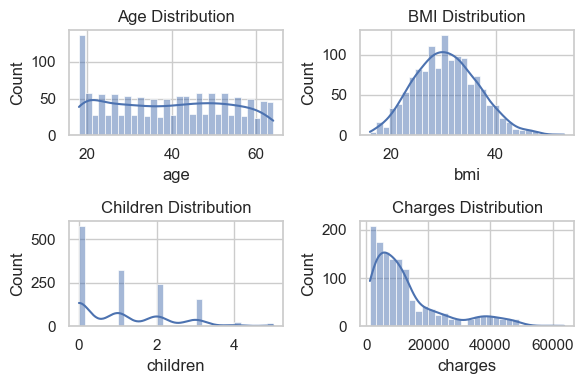

In [24]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

sns.histplot(df['children'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

sns.histplot(df['charges'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()

In [25]:
def detect_outlier(data,treshold=1.5):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    iqr = q3 - q1

    lower_bound = q1 - treshold * iqr
    upper_bound = q3 + treshold * iqr

    return lower_bound,upper_bound

low,up = detect_outlier(df["bmi"])
print(df[(df["bmi"] < low) | (df["bmi"] > up)])
index = df[(df["bmi"] < low) | (df["bmi"] > up)].index
df.drop(index=index,inplace=True)
df.reset_index(drop=True,inplace=True)

      age     sex    bmi  children smoker     region      charges bmi_group
116    58    male  49.06         0     no  southeast  11381.32540     obese
286    46  female  48.07         2     no  northeast   9432.92530     obese
401    47    male  47.52         1     no  southeast   8083.91980     obese
543    54  female  47.41         0    yes  southeast  63770.42801     obese
847    23    male  50.38         1     no  southeast   2438.05520     obese
860    37  female  47.60         2    yes  southwest  46113.51100     obese
1047   22    male  52.58         1    yes  southeast  44501.39820     obese
1088   52    male  47.74         1     no  southeast   9748.91060     obese
1317   18    male  53.13         0     no  southeast   1163.46270     obese


               age          bmi     children       charges
count  1328.000000  1328.000000  1328.000000   1328.000000
mean     39.219127    30.537308     1.097139  13221.047810
std      14.042170     5.922176     1.208008  11997.547468
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.220000     0.000000   4744.325050
50%      39.000000    30.300000     1.000000   9369.615750
75%      51.000000    34.488750     2.000000  16604.302645
max      64.000000    46.750000     5.000000  62592.873090


<Axes: xlabel='bmi', ylabel='Count'>

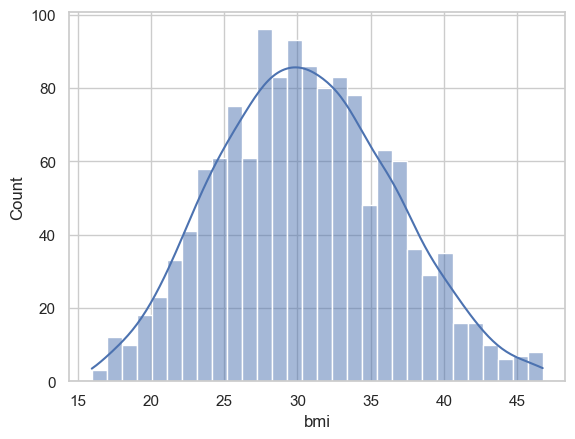

In [26]:
print(df.describe())

sns.histplot(df['bmi'], bins=30, kde=True)

In [27]:
from scipy.stats import skew

skewness_charges = skew(df['charges']).round(2)

print("Charges Skewness:", skewness_charges)

Charges Skewness: 1.5


In [28]:
from scipy.stats import skew

skewness_bmi = skew(df['bmi']).round(2)
skewness_age = skew(df['age']).round(2)
skewness_child = skew(df['children']).round(2)

print("Charges Skewness:", skewness_charges)
print("BMI Skewness:", skewness_bmi)
print("Age Skewness:", skewness_age)
print("Children Skewness:", skewness_child)

Charges Skewness: 1.5
BMI Skewness: 0.16
Age Skewness: 0.06
Children Skewness: 0.93


In [29]:
from scipy.stats import kurtosis

kurtosis_charges = kurtosis(df['charges']).round(2)
kurtosis_bmi = kurtosis(df['bmi']).round(2)
kurtosis_age = kurtosis(df['age']).round(2)
kurtosis_child = kurtosis(df['children']).round(2)

print("Charges Kurtosis:", kurtosis_charges)
print("BMI Kurtosis:", kurtosis_bmi)
print("Age Kurtosis:", kurtosis_age)
print("Children Kurtosis:", kurtosis_age)

Charges Kurtosis: 1.52
BMI Kurtosis: -0.37
Age Kurtosis: -1.24
Children Kurtosis: -1.24


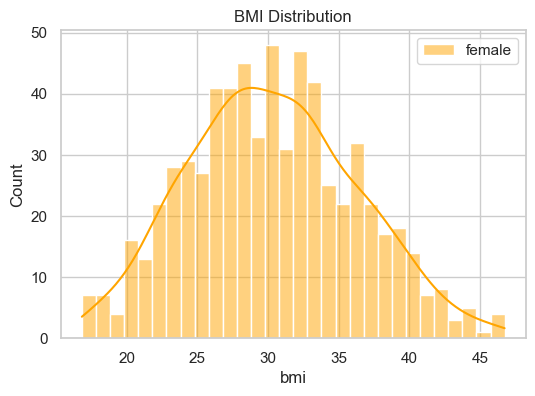

In [30]:
df_males = df[df['sex'] == 'male']
df_females = df[df['sex'] == 'female']

fig, axes = plt.subplots(figsize=(6, 4))

female_plot = sns.histplot(df_females['bmi'], bins=30, kde=True,label = 'female', color='orange')
female_plot.set_title('Female BMI Distribution')

axes.set_title('BMI Distribution')
axes.legend()

plt.show()

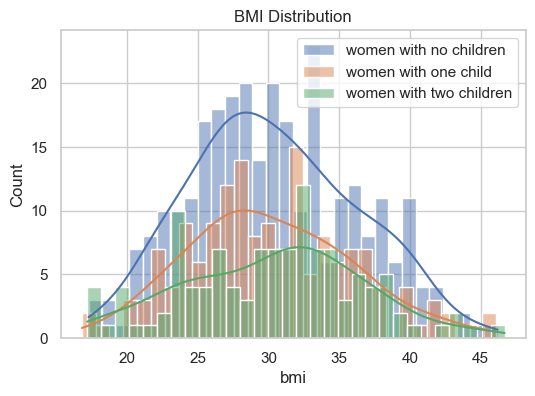

In [31]:
df_females = df[df['sex'] == 'female']

df_females_0 = df_females[df_females['children'] == 0]
df_females_1 = df_females[df_females['children'] == 1]
df_females_2 = df_females[df_females['children'] == 2]

fig, axes = plt.subplots(figsize=(6, 4))

sns.histplot(df_females_0['bmi'], bins=30, kde=True, label = 'women with no children')
sns.histplot(df_females_1['bmi'], bins=30, kde=True,label = 'women with one child')
sns.histplot(df_females_2['bmi'], bins=30, kde=True,label = 'women with two children')

axes.set_title('BMI Distribution')
axes.legend()

plt.show()

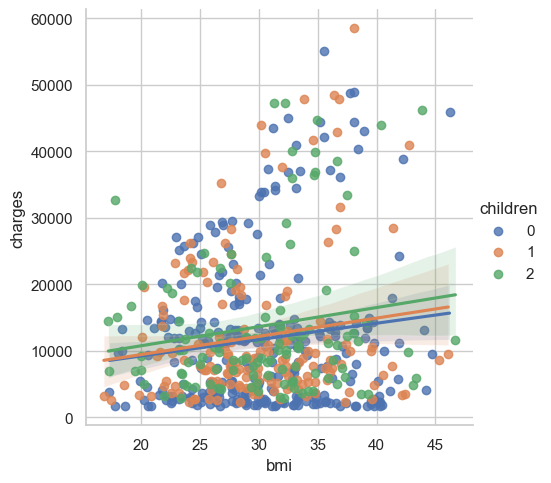

In [32]:
df_females_0to2 = pd.DataFrame()

df_females_0to2= pd.concat([df_females_0to2, df_females_0])
df_females_0to2= pd.concat([df_females_0to2, df_females_1])
df_females_0to2= pd.concat([df_females_0to2, df_females_2])

sns.lmplot(df_females_0to2, x = 'bmi', y = 'charges', hue = 'children')

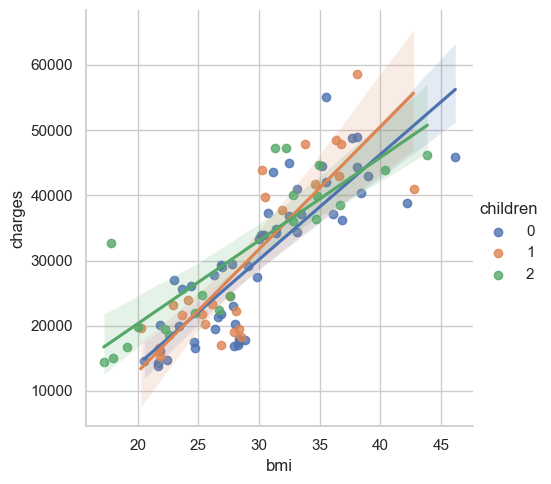

In [33]:
df_females_0to2_smoke = df_females_0to2[df_females_0to2['smoker'] == 'yes']
sns.lmplot(df_females_0to2_smoke, x = 'bmi', y = 'charges', hue = 'children')

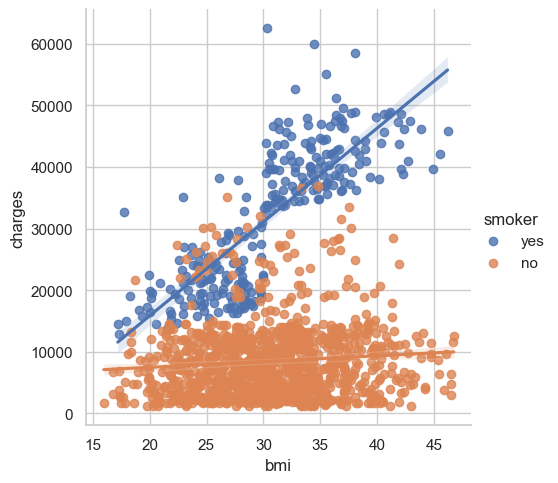

In [34]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

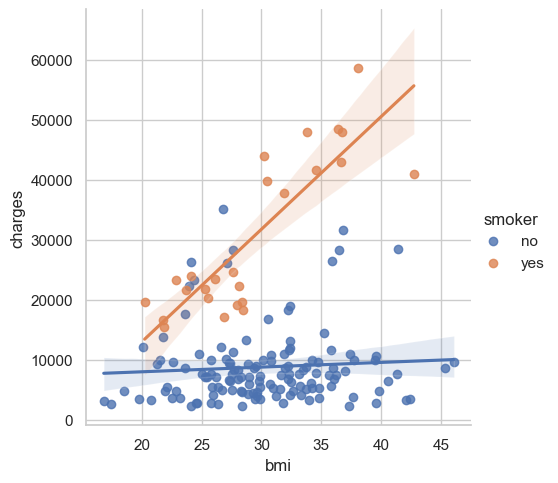

In [35]:
df_females_0to2_smoke1 = df_females_0to2[df_females_0to2['children'] == 0]
df_females_0to2_smoke1 = df_females_0to2[df_females_0to2['children'] == 1]

sns.lmplot(df_females_0to2_smoke1, x = 'bmi', y = 'charges', hue = 'smoker')

    age     sex    bmi  children smoker     region     charges   bmi_group
0    19  female  27.90         0    yes  southwest  16884.9240  overweight
11   62  female  26.29         0    yes  southeast  27808.7251  overweight
64   20  female  22.42         0    yes  northwest  14711.7438      normal
70   27  female  24.75         0    yes  southeast  16577.7795      normal
86   57  female  31.16         0    yes  northwest  43578.9394       obese
    age     sex     bmi  children smoker     region      charges   bmi_group
5    31  female  25.740         0     no  southeast   3756.62160  overweight
9    60  female  25.840         0     no  northwest  28923.13692  overweight
13   56  female  39.820         0     no  southeast  11090.71780       obese
20   60  female  36.005         0     no  northeast  13228.84695       obese
26   63  female  23.085         0     no  northeast  14451.83515      normal


C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40)
C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=40)
C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40)
C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,2

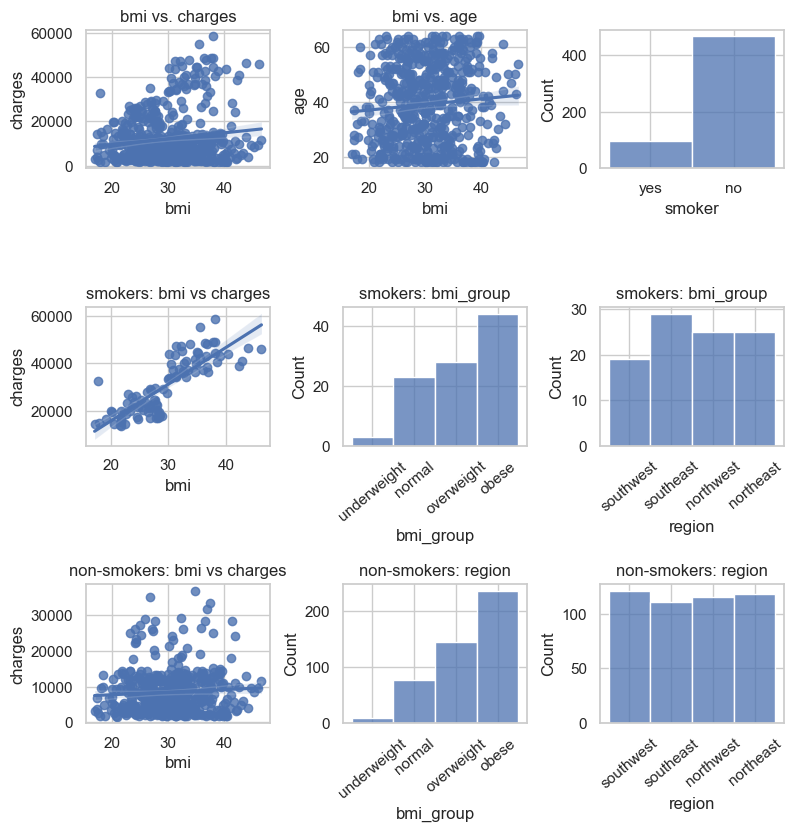

In [36]:
def examine_trends(df):
  fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(9, 9))

  sns.regplot(df, x = 'bmi', y = 'charges', ax = axes[0,0])
  axes[0, 0].set_title('bmi vs. charges')
  sns.regplot(df, x = 'bmi', y = 'age', ax = axes[0,1])
  axes[0, 1].set_title('bmi vs. age')
  sns.histplot(df['smoker'], ax = axes[0,2])

  df_smoke = df[df['smoker'] == 'yes']
  print(df_smoke.head())

  sns.regplot(df_smoke, x = 'bmi', y = 'charges', ax = axes[1,0])
  axes[1,0].set_title('smokers: bmi vs charges')

  sns.histplot(df_smoke['bmi_group'], ax = axes[1,1])
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40)
  axes[1,1].set_title('smokers: bmi_group')

  sns.histplot(df_smoke['region'], ax = axes[1,2])
  axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=40)
  axes[1,2].set_title('smokers: bmi_group')

  df_nonsmoke = df[df['smoker'] == 'no']
  print(df_nonsmoke.head())

  sns.regplot(df_nonsmoke, x = 'bmi', y = 'charges', ax = axes[2,0])
  axes[2,0].set_title('non-smokers: bmi vs charges')

  sns.histplot(df_nonsmoke['bmi_group'], ax = axes[2,1])
  axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40)
  axes[2,1].set_title('non-smokers: region')

  sns.histplot(df_nonsmoke['region'], ax = axes[2,2])
  axes[2,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=40)
  axes[2,2].set_title('non-smokers: region')


  fig.subplots_adjust(wspace=0.4, hspace=1.0)

examine_trends(df_females_0to2)

    age     sex    bmi  children smoker     region     charges   bmi_group
0    19  female  27.90         0    yes  southwest  16884.9240  overweight
11   62  female  26.29         0    yes  southeast  27808.7251  overweight
64   20  female  22.42         0    yes  northwest  14711.7438      normal
70   27  female  24.75         0    yes  southeast  16577.7795      normal
86   57  female  31.16         0    yes  northwest  43578.9394       obese
    age     sex     bmi  children smoker     region      charges   bmi_group
5    31  female  25.740         0     no  southeast   3756.62160  overweight
9    60  female  25.840         0     no  northwest  28923.13692  overweight
13   56  female  39.820         0     no  southeast  11090.71780       obese
20   60  female  36.005         0     no  northeast  13228.84695       obese
26   63  female  23.085         0     no  northeast  14451.83515      normal


C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40)
C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=40)
C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=40)
C:\Users\chuch\AppData\Local\Temp\ipykernel_15788\698283473.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2,2

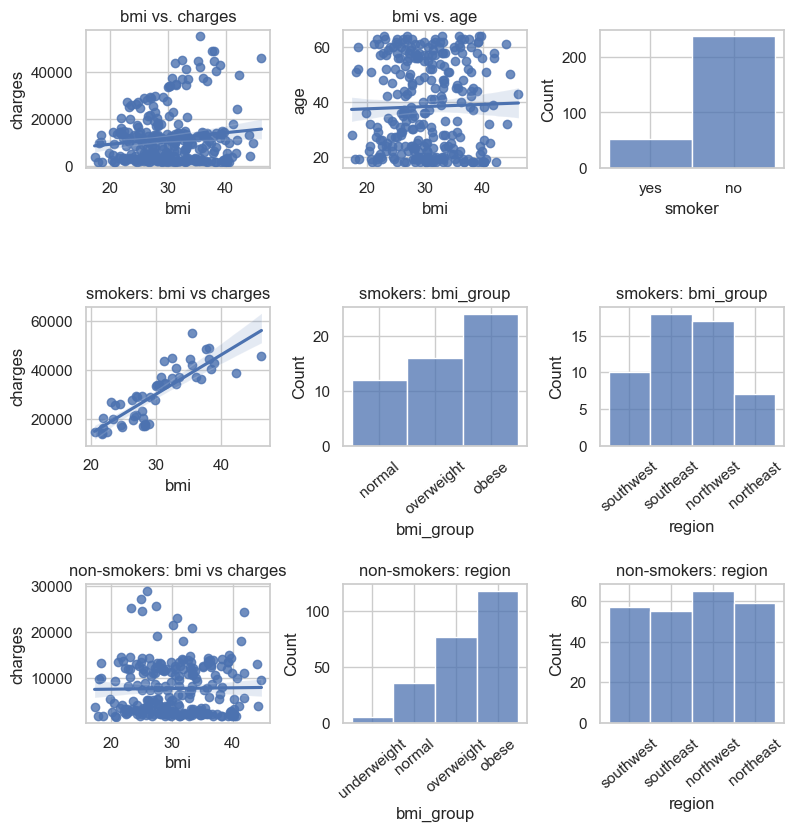

In [37]:
examine_trends(df_females_0)

In [ ]:
examine_trends(df_females_1)

In [ ]:
examine_trends(df_females_2)

In [ ]:
df_females_3 = df_females[df_females['children'] == 3]
df_females_4 = df_females[df_females['children'] == 4]
df_females_5 = df_females[df_females['children'] == 5]

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10, 8))

sns.histplot(df_females_0['bmi'], bins=30, kde=True, label = 'women with no children',ax=axes[0, 0])
axes[0, 0].set_title('women with no children')
sns.histplot(df_females_1['bmi'], bins=30, kde=True,label = 'women with one child',ax=axes[0, 1])
axes[0, 1].set_title('women with one children')
sns.histplot(df_females_2['bmi'], bins=30, kde=True,label = 'women with two children',ax=axes[1, 0])
axes[1, 0].set_title('women with two children')
sns.histplot(df_females_3['bmi'], bins=30, kde=True,label = 'women with three children',ax=axes[1, 1])
axes[1, 1].set_title('women with three children')
sns.histplot(df_females_4['bmi'], bins=30, kde=True,label = 'women with four children',ax=axes[2, 0])
axes[2, 0].set_title('women with four children')
sns.histplot(df_females_5['bmi'], bins=30, kde=True,label = 'women with five children',ax=axes[2, 1])
axes[2, 1].set_title('women with five children')

fig.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

In [ ]:
df_smokers_m = df_males[df_males['smoker'] == 'yes']

df_smokers_f = df_females[df_females['smoker'] == 'yes']

fig, axes = plt.subplots(figsize=(4, 4))
sns.histplot(df_smokers_f['charges'], bins=30, kde=True,label = 'female smokers')
sns.histplot(df_smokers_m['charges'], bins=30, kde=True, label = 'male smokers')

axes.set_title('Smokers distribution')
axes.legend()

In [ ]:
df_smokers = df[df['smoker'] == 'yes']

df_smokers_m = df_smokers[df_smokers['sex']== 'male']
df_smokers_f = df_smokers[df_smokers['sex']== 'female']

df_smokers_m_obese = df_smokers_m[df_smokers['bmi_group']== 'obese']
df_smokers_f_obese = df_smokers_f[df_smokers['bmi_group']== 'obese']


fig, axes = plt.subplots(figsize=(4, 4))
sns.histplot(df_smokers_m_obese['charges'], bins=30, kde=True,label = 'male smokers')
sns.histplot(df_smokers_f_obese['charges'], bins=30, kde=True, label = 'female smokers')

axes.set_title('Obese smokers charges distribution by sex')
axes.legend()

In [ ]:
print(df_smokers_m.head())

sns.lmplot(df_smokers_m, x ='age', y = 'charges', hue = 'bmi_group')

sns.lmplot(df_smokers_m, x ='age', y = 'charges', hue = 'children')

sns.lmplot(df_smokers_m, x ='age', y = 'charges', hue = 'region')
sns.lmplot(df_smokers_m, x ='bmi', y = 'charges', hue = 'region')

In [ ]:
df.head()

In [ ]:
df_se = df[df['region'] == 'southeast']
df_sw = df[df['region'] == 'southwest']
df_ne = df[df['region'] == 'northeast']
df_nw = df[df['region'] == 'northwest']

def lmplot_regions(df):
  sns.lmplot(df, x = 'bmi', y = 'charges', hue = 'sex')
  sns.lmplot(df, x = 'bmi', y = 'charges', hue = 'smoker')

  sns.lmplot(df, x = 'age', y = 'charges', hue = 'sex')
  sns.lmplot(df, x = 'age', y = 'charges', hue = 'smoker')
  sns.lmplot(df, x = 'age', y = 'charges', hue = 'bmi_group')

In [ ]:
lmplot_regions(df_se)

In [ ]:
lmplot_regions(df_sw)

In [ ]:
lmplot_regions(df_ne)

In [ ]:
lmplot_regions(df_nw)

In [ ]:
sns.pairplot(df,kind = 'reg', height = 2, hue="smoker")

In [ ]:
sns.pairplot(df_males,kind = 'reg', height = 2, hue="smoker")

In [ ]:
sns.pairplot(df_females,kind = 'reg', height = 2, hue="smoker")

In [ ]:
with sns.axes_style("whitegrid"):
    sns.scatterplot(x=df['age'], y=df['charges'])
    plt.xlabel('Age')
    plt.ylabel('Charges (USD)')
    plt.title('Scatter Plot of Charges by Age')

plt.show()

In [ ]:
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['children'], hue_norm=(0, 5), palette = 'viridis', legend="full")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Age and children vs. Charges')
plt.legend(title='Children', loc='upper right')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, col in enumerate([col for col in df.columns if df[col].nunique() <= 6], 1):
    plt.subplot(2, 3, i)

    ax = sns.boxplot(data=df, x=df[col].astype('category'), y='charges', showmeans = True, meanline = True, medianprops = dict(color = "red", linewidth = 1.5))
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [ ]:
sns.catplot(data=df,
            x="bmi_group", y="charges", hue="smoker", kind="box", palette="viridis")

sns.despine(left=True)
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.title('Charges by BMI and Smoking')
plt.show()

In [ ]:
sns.catplot(data=df,
            x="region", y="charges", hue="smoker", kind="box", palette="viridis")

sns.despine(left=True)
plt.xlabel('region')
plt.ylabel('Charges')
plt.title('Charges by Region and Smoking')
plt.show()

In [ ]:
fig , ax = plt.subplots()
df["children"].value_counts().plot(kind="bar",ax=ax,colormap="plasma")
ax.grid(axis="y",ls="--",color="gray")
ax.set(ylabel="counts",title="Number of Children");

# Part 2 - Correlation

In [ ]:
df_cleaned = df

df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

In [ ]:
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

In [ ]:
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])
df_encoded.sample(5)

In [ ]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

In [ ]:
df_cat=df_encoded.drop(['bmi_group','age_group'], axis = 1)
df_cat.head()

print(df_cat.dtypes)

from sklearn import preprocessing
label = preprocessing.LabelEncoder()


In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cat.corr(),cmap='coolwarm',annot=True)

In [ ]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group', 'bmi_group']]
corr_matrix_1 = df_encoded[numr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_1, annot=True, cmap = 'crest',
                mask=np.triu(corr_matrix_1),
                            annot_kws = {"size":8});

plt.title("Correlation Matrix")
plt.show()

threshold = 0.3
relevant_features = corr_matrix_1[(corr_matrix_1['charges'].abs() > threshold) & (corr_matrix_1.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

In [ ]:
df_cleaned_1 = df_cleaned.copy()
percetage_data(df_cleaned_1,['age_group','smoker'], sort=False)

# Part 3 - OLS Regression

In [ ]:
XX = df_encoded[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_northeast',	'region_northwest',	'region_southeast',	'region_southwest']]# Features
yy = df_encoded['charges']

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(XX_train, yy_train)

yy_pred = linear_model.predict(XX_test)

mse = mean_squared_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)

(mse, r2)

In [ ]:
coefficients = pd.DataFrame(linear_model.coef_, XX.columns, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', ascending=False)

In [ ]:
X = df_encoded[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded']]
y = df_encoded['charges']

X = sm.add_constant(X)

est = sm.OLS(y, X).fit()

print(est.summary())

In [ ]:
import statsmodels.api as sm
import numpy as np
from scipy.stats import skew, kurtosis

X = df_encoded[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded']]
y = df_encoded['charges']

X = sm.add_constant(X)

est = sm.OLS(y, X).fit()

predicted_values = est.predict(X)

# Residuals
residuals = y - predicted_values

# Skewness and kurtosis of residuals
skewness = skew(residuals)
kurt = kurtosis(residuals)

print("Skewness of residuals:", skewness)
print("Kurtosis of residuals:", kurt)

In [ ]:
print('Parameters: ', est.params)
print()
print('R2: ', round(est.rsquared, 3))
print()
print('Standard errors: ', est.bse)

In [ ]:
prediction = est.predict()

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(df_encoded['charges'], color='g', label='Original')
plt.plot(prediction, color='b', label='Prediction')

plt.title('Original vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
residuals = pd.Series(est.resid)
residuals[:5]

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

residuals.plot(ax=ax[0])
residuals.plot(kind='density', ax=ax[1])

ax[0].set_title('Residual Plot')
ax[1].set_title('Density Plot')

plt.tight_layout()
plt.show()

# Part 4 - Linear Regression and Decision Trees

In [ ]:
X = df_encoded[['age', 'bmi', 'smoker_encoded']]
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
print('Intercept', lm.intercept_)
print('Coefficient', lm.coef_)
print('Score', lm.score(X_test, y_test))

In [ ]:
print("Summary statistics of y_test:")
print(y_test.describe())


In [ ]:
negative_values = y_test[y_test < 0]
print("Negative values in y_test:")
print(negative_values)

In [ ]:
y_pred1 = lm.predict(X_test)
lm_mse = mean_squared_error(y_test, y_pred1)
print("Linear Regression - MSE: ", lm_mse)
lm_rmse = np.sqrt(lm_mse)
print("Linear Regression - RMSE: ", lm_rmse)

In [ ]:
ax1 = sns.histplot(y_test, kde=True, color="g", label="Actual Value", element='step')
sns.histplot(y_pred1, kde=True, color="b", label="Fitted Values", ax=ax1, element='step')

mean_y_test = y_test.mean()
plt.axvline(mean_y_test, color='g', linestyle='--', label='Mean of Actual Value')

mean_y_pred1 = y_pred1.mean()
plt.axvline(mean_y_pred1, color='b', linestyle='--', label='Mean of Fitted Values')

plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

In [ ]:
X = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y = np.array(df_encoded['charges'])

# Defining number of folds for cross-validation
n_splits = 3
kf = KFold(n_splits=n_splits)

# Initializing lists to store MSE scores
mse_scores = []

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fitting linear regression model
    model1 = LinearRegression()
    model1.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = model1.predict(X_test)
    
    # Calculating MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculating average MSE across all folds
avg_mse = np.mean(mse_scores)
print("Average MSE:", avg_mse)

lr_rmse = np.sqrt(avg_mse)
print("Linear Regression - RMSE: ", lr_rmse)

In [ ]:
X = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y = np.array(df_encoded['charges'])

# Defining the range of training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10) 

# Defining the linear regression model
model = LinearRegression()

# Learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calculatinh mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curves (Linear Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, dt_predictions, color='green', cmap = 'crest', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [ ]:
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)

print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)

print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

dt_rmse = np.sqrt(dt_mse)
print("Decision Tree Regression - RMSE: ", dt_rmse)

In [ ]:
# Residuals
residuals = y_test - dt_predictions

# Computing skewness and kurtosis of residuals
skewness = skew(residuals)
kurt = kurtosis(residuals)

print("Skewness of residuals:", skewness)
print("Kurtosis of residuals:", kurt)

In [ ]:
new_data = pd.DataFrame({'age': [30], 'bmi': [32.10], 'smoker_encoded': [1]})

dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

In [ ]:
X2 = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y2 = np.array(df_encoded['charges'])

# Defining number of folds for cross-validation
n_splits = 50
kf = KFold(n_splits=n_splits)

# Initializing lists to store MSE scores
mse2_scores = []

# Performing k-fold cross-validation
for train_index, test_index in kf.split(X2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    
    # Fitting decision tree model
    model = DecisionTreeRegressor()
    model.fit(X2_train, y2_train)
    
    # Predicting on test set
    y2_pred = model.predict(X2_test)
    
    # Calculating MSE
    mse2 = mean_squared_error(y2_test, y2_pred)
    mse2_scores.append(mse2)

# Calculating average MSE across all folds
avg2_mse = np.mean(mse2_scores)
print("Average MSE:", avg2_mse)

dt_rmse = np.sqrt(avg2_mse)
print("Decision Tree - RMSE: ", dt_rmse)

In [ ]:
X5 = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y5 = np.array(df_encoded['charges'])

# Defining the range of training set sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 equally spaced training set sizes from 10% to 100%

# Defining the decision tree regressor model
model = DecisionTreeRegressor()

# Learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=model, X=X5, y=y5, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curves (Decision Tree Regressor)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
X = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y = np.array(df_encoded['charges'])

train_sizes = np.linspace(0.1, 1.0, 10) 

# Defining the random forest regressor model
model = RandomForestRegressor()

# Learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curves (Random Forest)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
X = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y = np.array(df_encoded['charges'])

train_sizes = np.linspace(0.1, 1.0, 10) 

# Defining the gradient boosting regressor model
model = GradientBoostingRegressor()

# Generating learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=model, X=X, y=y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curves (Gradient Boost)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
X6 = np.array(df_encoded[['age', 'bmi', 'smoker_encoded']])
y6 = np.array(df_encoded['charges'])

train_sizes = np.linspace(0.1, 1.0, 10) 

# Defining the degree of polynomial features
degree = 3

# Creating a pipeline for polynomial regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Generating learning curves
train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=model, X=X6, y=y6, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

# Calculating mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="b")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.title("Learning Curves (Polynomial Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()